# Unsupervised Learning

This notebook covers fundamentals of **Unsupervised Learning** with worked-out solutions.

## Definition 

Unsupervised learning trains models on **unlabeled data** to find patterns, structures, or relationships.

## Types of Unsupervised Learning
1. **Clustering** → grouping data points (e.g. K-Means, DBSCAN)
2. **Dimensionality Reduction** → reduce features (e.g. PCA, Autoencoders)
3. **Density Estimation / Generative Modeling** → model distributions (e.g. GMM, GANs)
4. **Anomaly Detection** → detect unusual data points (e.g. Isolation Forest)

# Models


## 1. K-Means Clustering

- Partition data into k clusters.

- Algorithm steps:

    - Initialize k random centroids.

    - Assign each data point to the nearest centroid.

    - Recompute centroids as the mean of assigned points.

    - Repeat until convergence.

**Objective**: Minimize within-cluster sum of squares (WCSS).

### Code from scratch

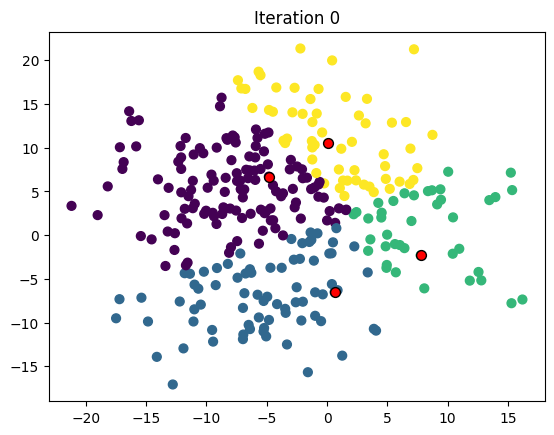

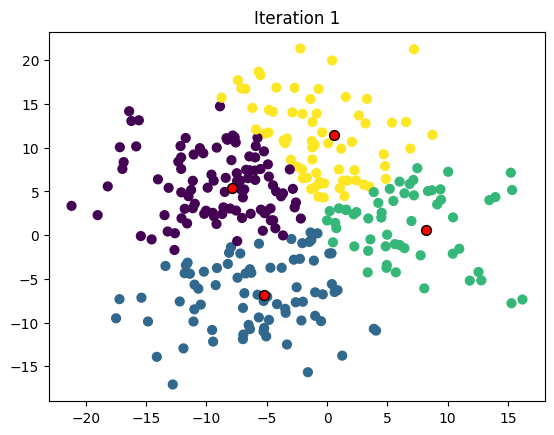

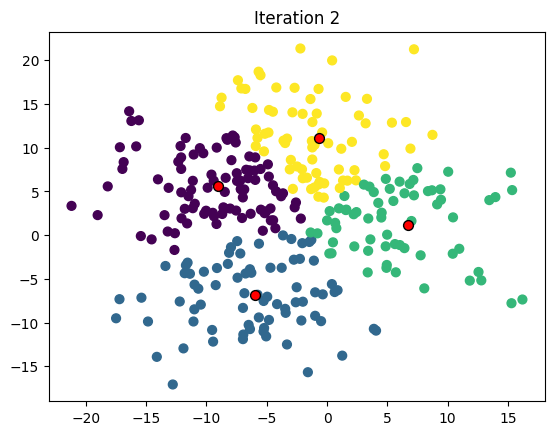

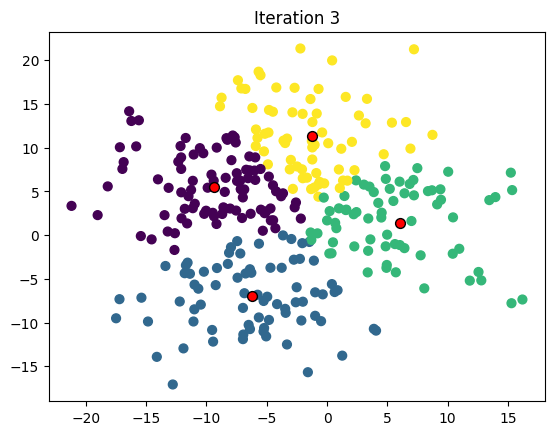

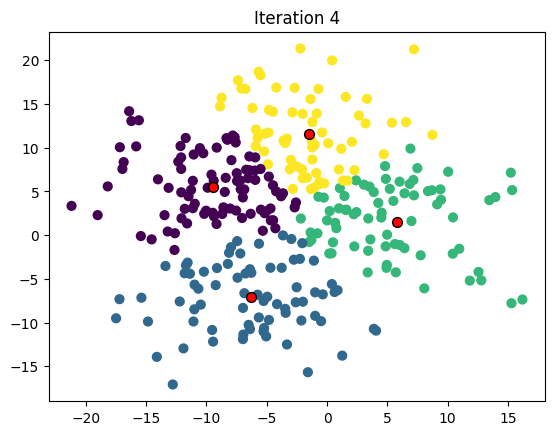

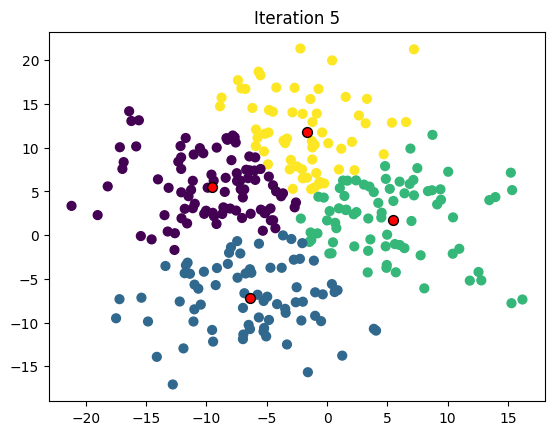

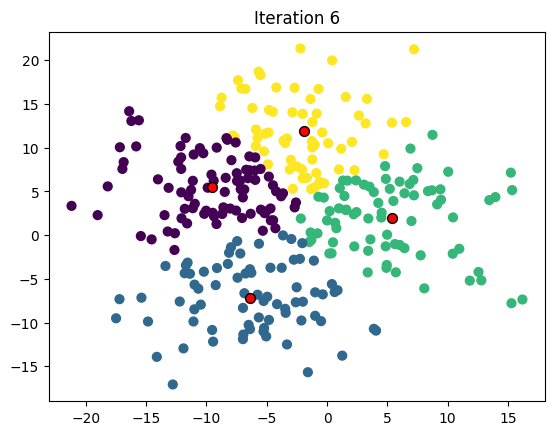

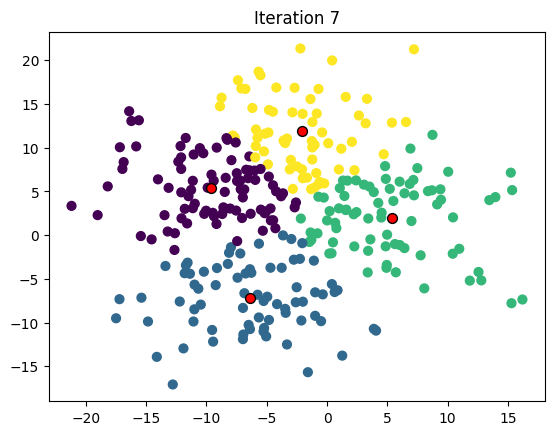

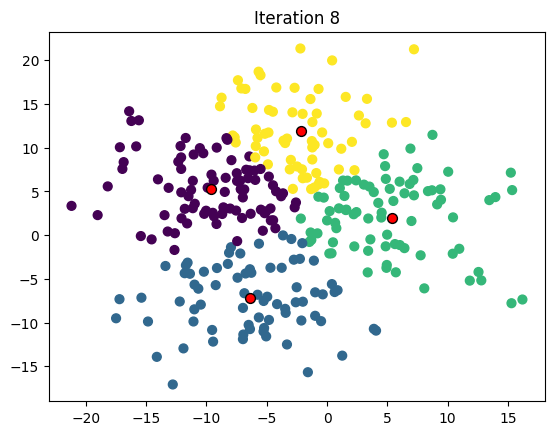

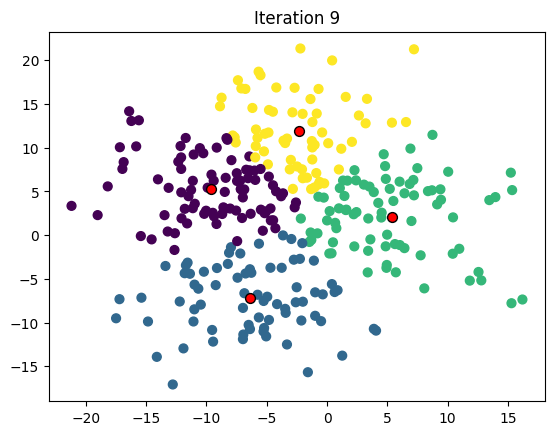

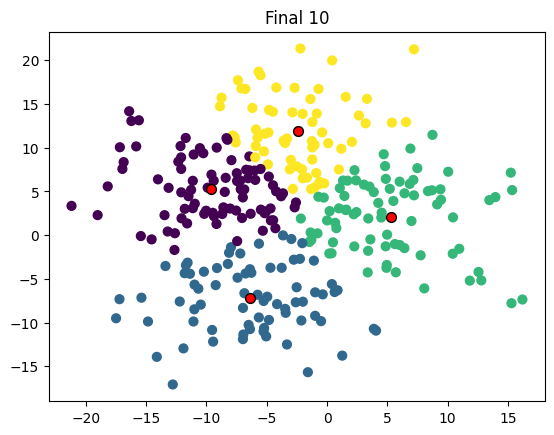

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class KMeansScratch:
    def __init__(self, n_clusters=3, max_iters=10, tol=1e-4, random_state=None, verbose=True):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol # tolerance to declare convergence, i.e., if centroids do not move more than tol
        self.random_state = random_state
        self.verbose = verbose
        
    def fit(self, X):
        np.random.seed(self.random_state)
        
        # 1. Initialize centroids randomly
        random_idx = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[random_idx]
        
        for i in range(self.max_iters):
            # 2. Assign clusters (closest centroid)
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2) # applies L2 norm
            self.labels = np.argmin(distances, axis=1)
            
            # 3. Plot current state
            if self.verbose:
                self._plot_iteration(X, i)
            
            # 4. Compute new centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) 
                                      for j in range(self.n_clusters)])
            
            # 5. Check for convergence
            shift = np.linalg.norm(self.centroids - new_centroids)
            if shift < self.tol:
                print(f"Converged at iteration {i}")
                break
            self.centroids = new_centroids
        
        # Final plot
        if self.verbose:
            self._plot_iteration(X, i+1, final=True)
        
        return self
    
    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def _plot_iteration(self, X, iteration, final=False):
        plt.scatter(X[:,0], X[:,1], c=self.labels, cmap='viridis', s=40)
        plt.scatter(self.centroids[:,0], self.centroids[:,1], 
                    c='red', marker='.', s=200, edgecolors='black')
        plt.title(f"{'Final' if final else 'Iteration'} {iteration}")
        plt.show()

# Generate dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=5, random_state=42)

# Run custom KMeans with plots
kmeans = KMeansScratch(n_clusters=4, max_iters=10, verbose=True)
kmeans.fit(X)


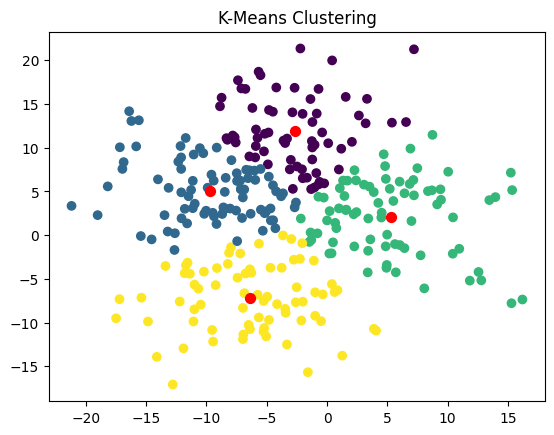

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=5, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='.', s=200)
plt.title("K-Means Clustering")
plt.show()

### Pros

 - Simple, fast, scalable.

 - Works well for spherical, well-separated clusters.

### Cons

 - Requires choosing k.

 - Sensitive to initialization and outliers.

## 2. DBSCAN (Density-Based Spatial Clustering)

 - Groups points that are densely packed together.

 - Needs 2 parameters:

     - eps (neighborhood size)

     - min_samples (minimum points to form dense region).

 - Points are classified as:

     - Core (dense regions),

     - Border (near dense regions),

     - Noise (outliers).

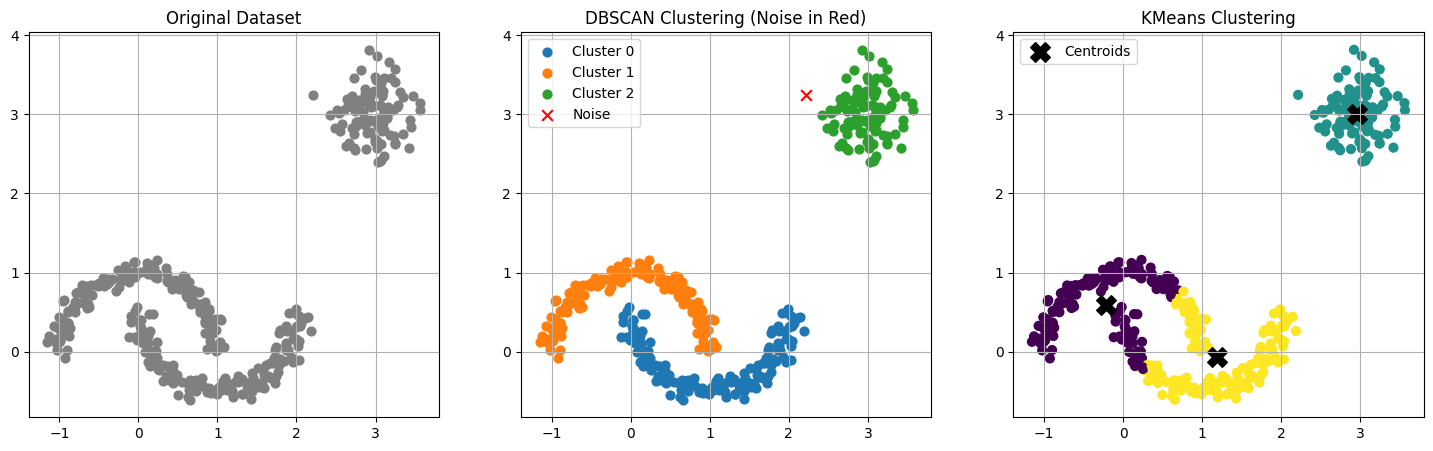

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN, KMeans

X1, _ = make_moons(n_samples=300, noise=0.07, random_state=42)   # Non-linear clusters
X2, _ = make_blobs(n_samples=100, centers=[[3, 3]], cluster_std=0.3, random_state=42)  # Extra blob
X = np.vstack([X1, X2])  # Combine datasets

dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps = neighborhood radius, min_samples = density threshold
labels_db = dbscan.fit_predict(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X)

# Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original dataset
axes[0].scatter(X[:, 0], X[:, 1], s=40, c='gray')
axes[0].set_title("Original Dataset")
axes[0].grid(True)

# DBSCAN with noise
unique_labels = set(labels_db)
for label in unique_labels:
    if label == -1:  # Noise
        axes[1].scatter(X[labels_db == label, 0], X[labels_db == label, 1],
                        c="red", marker="x", s=60, label="Noise")
    else:
        axes[1].scatter(X[labels_db == label, 0], X[labels_db == label, 1],
                        s=40, label=f"Cluster {label}")
axes[1].set_title("DBSCAN Clustering (Noise in Red)")
axes[1].legend()
axes[1].grid(True)

# KMeans
axes[2].scatter(X[:, 0], X[:, 1], c=labels_km, cmap="viridis", s=40)
axes[2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c="black", marker="X", s=200, label="Centroids")
axes[2].set_title("KMeans Clustering")
axes[2].legend()
axes[2].grid(True)

plt.show()


### Pros

 - Finds arbitrarily shaped clusters.

 - Robust to outliers.

 - No need to specify number of clusters.

### Cons

 - Sensitive to parameter choice (`eps` and `min_samples`).

 - Struggles with varying density.

 - Computationally expensive for large datasets.

## 3. Hierarchical Clustering

 - Builds a tree (dendrogram) of clusters.

 - Two approaches:

     - Agglomerative: Start with single points → merge.

     - Divisive: Start with all points → split.

 - Distance metrics: single-link, complete-link, average-link.

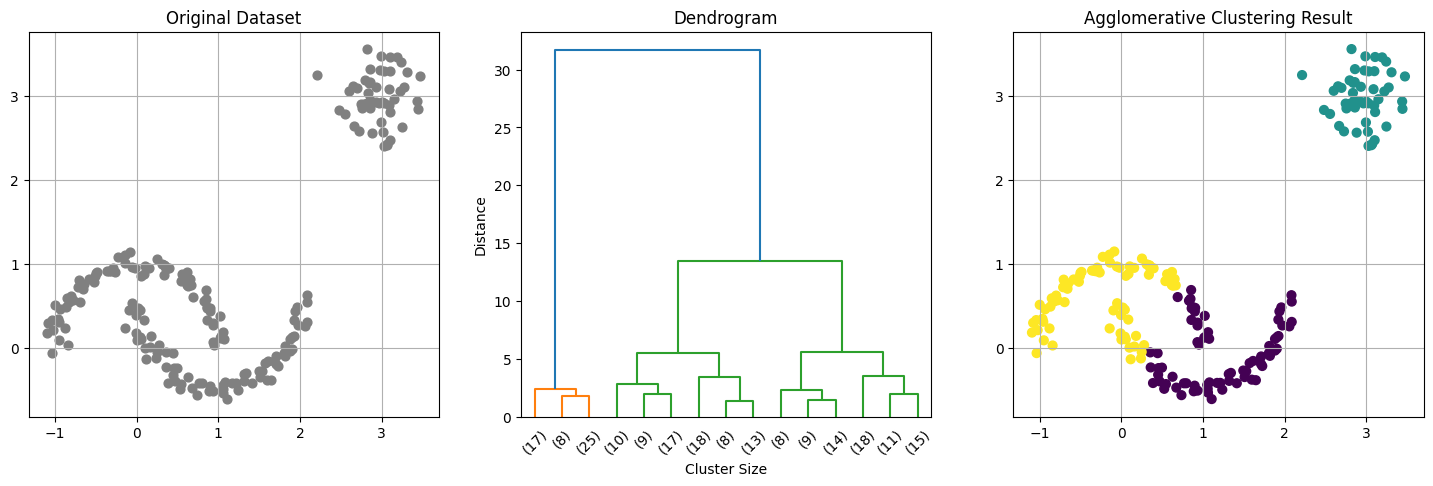

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Dataset
X1, _ = make_moons(n_samples=150, noise=0.07, random_state=42)
X2, _ = make_blobs(n_samples=50, centers=[[3, 3]], cluster_std=0.3, random_state=42)
X = np.vstack([X1, X2])

# Compute hierarchical linkage for dendrogram
# Linkage options: 'single', 'complete', 'average', 'ward'
Z = linkage(X, method='ward')  # Ward minimizes variance of merged clusters

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X)

# Plot Original + Dendrogram + Clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original dataset
axes[0].scatter(X[:, 0], X[:, 1], c='gray', s=40)
axes[0].set_title("Original Dataset")
axes[0].grid(True)

# Dendrogram
dendrogram(Z, truncate_mode='lastp', p=15, leaf_rotation=45, leaf_font_size=10, ax=axes[1])
axes[1].set_title("Dendrogram")
axes[1].set_xlabel("Cluster Size")
axes[1].set_ylabel("Distance")

# Final clusters
axes[2].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
axes[2].set_title("Agglomerative Clustering Result")
axes[2].grid(True)

plt.show()


The linkage method determines how the distance between clusters is computed during the merge process:

| Method     | How distance is computed                                 | Notes                                                                |
| ---------- | -------------------------------------------------------- | -------------------------------------------------------------------- |
| `single`   | Distance between **closest pair of points** in clusters  | Can create “chains” → elongated clusters                             |
| `complete` | Distance between **farthest pair of points** in clusters | Tends to create compact clusters                                     |
| `average`  | Average distance between **all pairs of points**         | Balances single vs complete                                          |
| `ward`     | Minimizes **variance within clusters** after merge       | Favors clusters with small variance; popular for Euclidean distances |

Choosing the right linkage affects the shape and size of clusters.


### Pros

 - No need to specify k upfront (can cut dendrogram at different levels).

 - Produces interpretable dendrogram.

### Cons

 - Computationally expensive (O(n²)).

 - Sensitive to noise and distance metric.

 - Not ideal for large datasets.

## PCA (Principal Component Analysis)

 - PCA is a linear dimensionality reduction technique.

 - It projects high-dimensional data into a lower-dimensional space while maximizing variance.

     - Center the data (subtract the mean).

     - Compute the covariance matrix of the data.

     - Compute eigenvalues and eigenvectors of the covariance matrix.

     - Sort eigenvectors by descending eigenvalues → largest variance first.

     - Project data onto the top k eigenvectors → reduced representation.

 - Each new axis (principal component) is a linear combination of original features.

### Pros

 - Fast and simple.

 - Preserves global structure of data (variance).

 - Easy to interpret.

### Cons

 - Linear method → cannot capture nonlinear relationships.

 - Sensitive to scaling of features.

## t-SNE (t-Distributed Stochastic Neighbor Embedding)

 - t-SNE is a nonlinear dimensionality reduction technique, mainly for visualization.

 - It maps high-dimensional data to a low-dimensional space (usually 2D or 3D) while preserving local structure (neighbor relationships).

     - Computes pairwise similarities between points in high-dimensional space (based on probabilities).

     - Tries to find a low-dimensional embedding where the pairwise similarities are preserved.

     - Uses gradient descent to minimize the difference (Kullback-Leibler divergence) between high-dimensional and low-dimensional similarities.

### Pros

 - Captures nonlinear relationships.

 - Great for visualizing clusters or complex structures.

### Cons

 - Computationally expensive (slow on large datasets).

 - Non-deterministic (results vary with random seed).

 - Only suitable for visualization, not general feature reduction for ML models.


| Feature          | PCA               | t-SNE                    |
| ---------------- | ----------------- | ------------------------ |
| Type             | Linear            | Nonlinear                |
| Goal             | Max variance      | Preserve local neighbors |
| Output           | Deterministic     | Randomized (can vary)    |
| Use Case         | Feature reduction | Visualization            |
| Speed            | Fast              | Slow                     |
| Interpretability | High              | Low (axes are abstract)  |


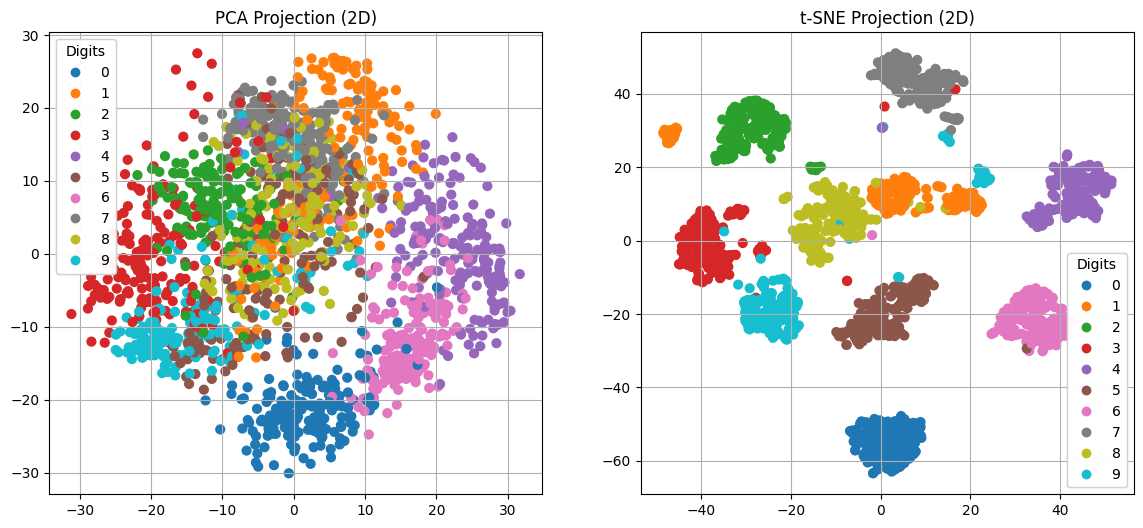

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Dataset
digits = load_digits()
X = digits.data     # 1797 samples, 64 features
y = digits.target   # labels 0-9

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=40)
axes[0].set_title("PCA Projection (2D)")
axes[0].grid(True)
legend1 = axes[0].legend(*scatter.legend_elements(), title="Digits")
axes[0].add_artist(legend1)

# t-SNE
scatter = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=40)
axes[1].set_title("t-SNE Projection (2D)")
axes[1].grid(True)
legend2 = axes[1].legend(*scatter.legend_elements(), title="Digits")
axes[1].add_artist(legend2)

plt.show()


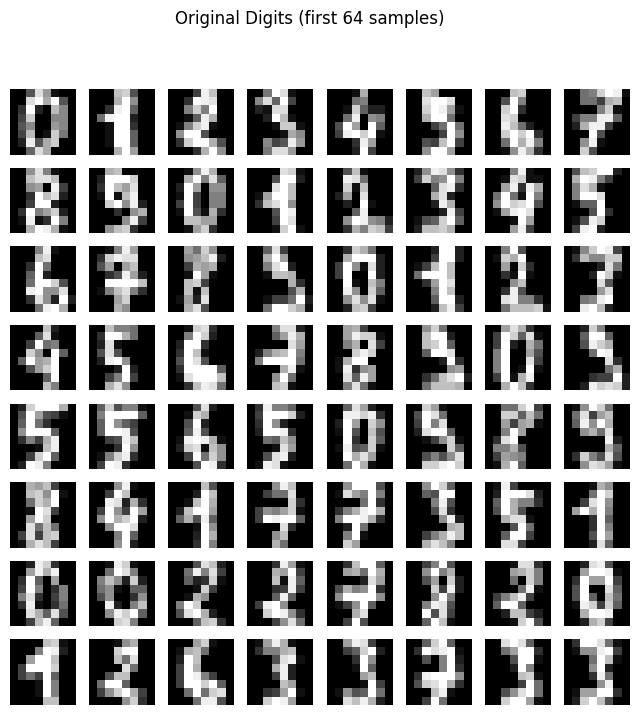

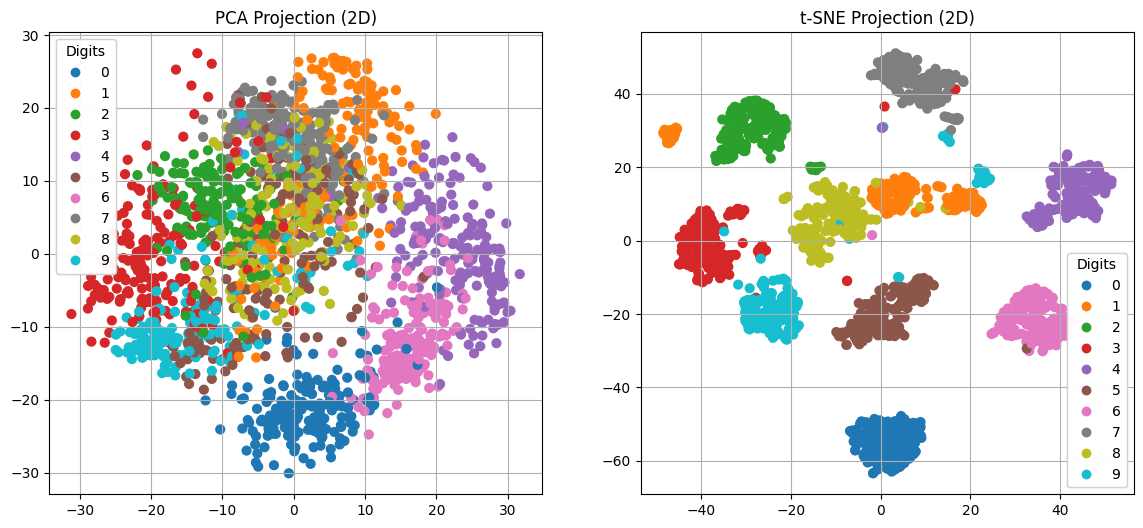

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- 1. Load dataset ---
digits = load_digits()
X = digits.data     # 1797 samples, 64 features (8x8 images)
y = digits.target

# --- 2. Apply PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# --- 3. Apply t-SNE ---
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# --- 4. Plot Original Images (first 64 samples) ---
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
plt.suptitle("Original Digits (first 64 samples)")
for i in range(64):
    ax = axes[i // 8, i % 8]
    ax.imshow(digits.images[i], cmap='gray')
    ax.axis('off')
plt.show()

# --- 5. Plot PCA and t-SNE projections ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=40)
axes[0].set_title("PCA Projection (2D)")
axes[0].grid(True)
legend1 = axes[0].legend(*scatter.legend_elements(), title="Digits")
axes[0].add_artist(legend1)

# t-SNE
scatter = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=40)
axes[1].set_title("t-SNE Projection (2D)")
axes[1].grid(True)
legend2 = axes[1].legend(*scatter.legend_elements(), title="Digits")
axes[1].add_artist(legend2)

plt.show()


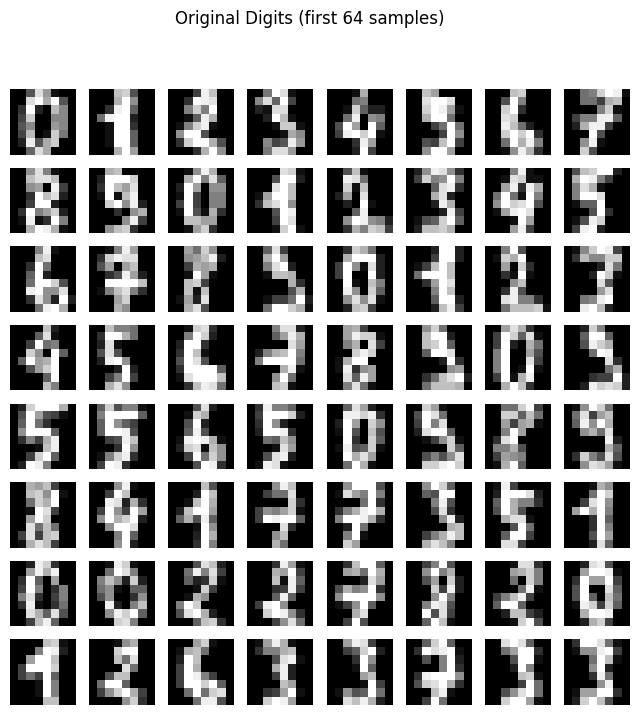

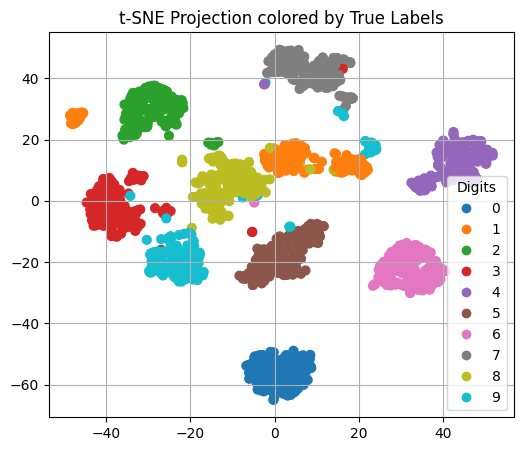

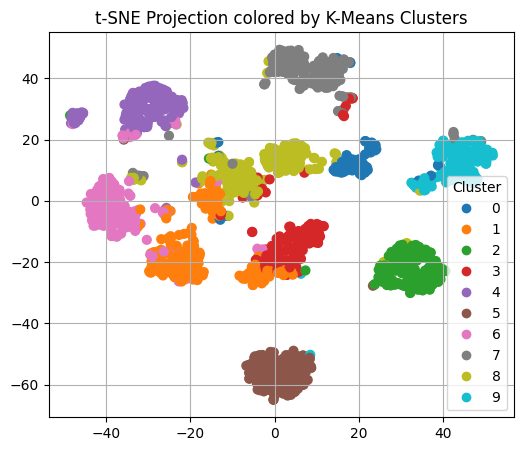

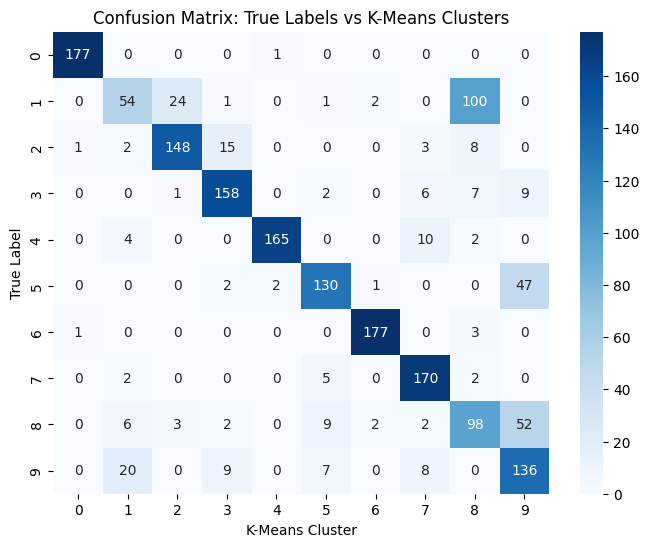

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Dataset
digits = load_digits()
X = digits.data      # 1797 samples, 64 features
y = digits.target    # true labels

# Original dataset visualization (first 64 samples)
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
plt.suptitle("Original Digits (first 64 samples)")
for i in range(64):
    ax = axes[i // 8, i % 8]
    ax.imshow(digits.images[i], cmap='gray')
    ax.axis('off')
plt.show()

# PCA for dimensionality reduction (speed up t-SNE)
pca = PCA(n_components=30, random_state=42)
X_pca = pca.fit_transform(X)

# t-SNE for 2D visualization
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# K-Means clustering on PCA-reduced data
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Plot t-SNE colored by true labels
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=40)
plt.title("t-SNE Projection colored by True Labels")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.show()

# Plot t-SNE colored by K-Means clusters
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='tab10', s=40)
plt.title("t-SNE Projection colored by K-Means Clusters")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

# Confusion Matrix to compare clusters with true labels
# Note: K-Means cluster labels are arbitrary (0-9), not guaranteed to match true digits

# Provide your mapping as a dictionary, e.g.:
mapping = {0: 1, 1: 9, 2: 6, 3: 5, 4: 2, 5: 0, 6: 3, 7: 7, 8: 8, 9: 4}
# Replace the above with your actual mapping

# Example usage:
mapped_labels = np.vectorize(mapping.get)(kmeans_labels)

# After mapping, you can recompute the confusion matrix:
cm = confusion_matrix(y, mapped_labels)
# cm = confusion_matrix(y, kmeans_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: True Labels vs K-Means Clusters")
plt.xlabel("K-Means Cluster")
plt.ylabel("True Label")
plt.show()
